In [63]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, scanpy as sc

In [64]:
cortex_short=sc.read('Copy of cortex_scAnnData.h5ad',var_names='gene_symbols')

/home/tusharp/.local/lib/python3.6/site-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/home/tusharp/.local/lib/python3.6/site-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


In [92]:
cat=cortex_short.obs.iloc[:,2]

In [66]:
c_s=pd.DataFrame(cortex_short.X)
c_s.shape

(3005, 558)

In [67]:
cortex_short.var

,gene_names
index,
0,MALAT1
1,PLP1
2,TTR
3,SST
4,HBB-BS
...,...
553,PLK2
554,NRSN1
555,MAP4


In [68]:
from ripser import ripser, Rips,lower_star_img
from persim import plot_diagrams

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


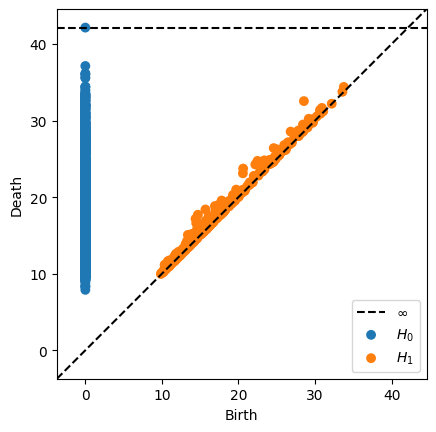

In [70]:
rips=Rips()
rips.metric_='cosine'
diagrams=rips.fit_transform(c_s)
rips.plot(diagrams,size=50)

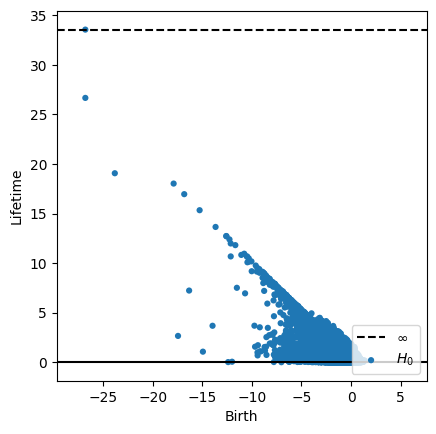

In [71]:
dgms=ripser(c_s,thresh=20)['dgms']
temp=lower_star_img(np.asarray(-c_s))
plot_diagrams(temp, lifetime = True)

In [72]:
idxs = np.arange(temp.shape[0])
idxs = idxs[np.abs(temp[:, 1] - temp[:, 0]) > 13]

In [73]:
len(idxs)

7

In [74]:
import io
import sys
import base64
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets
import kmapper as km
from kmapper import jupyter

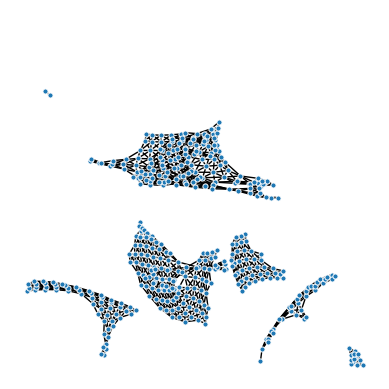

In [118]:
mapper = km.KeplerMapper(verbose=0)
projected_data = mapper.fit_transform(c_s,projection=sklearn.manifold.TSNE())
graph = mapper.map(projected_data,
                   clusterer=sklearn.cluster.DBSCAN(eps=0.3, min_samples=10),
                   cover=km.Cover(30, 0.5))
mapper.visualize(graph,path_html='heart_data.html',custom_tooltips=np.array(cat))
km.draw_matplotlib(graph)
import matplotlib.pyplot as plt
plt.show()
#this is euclidean metric, does not consider correlation

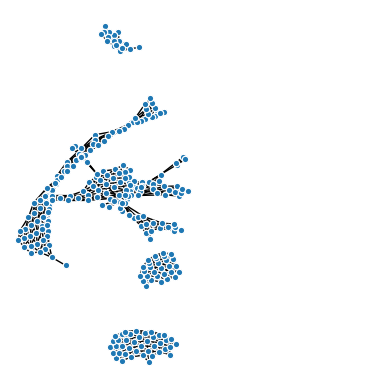

In [119]:
projected_data = mapper.fit_transform(c_s,projection=sklearn.manifold.TSNE(metric='cosine'))
graph = mapper.map(projected_data,
                   clusterer=sklearn.cluster.DBSCAN(eps=0.3, min_samples=15,metric='cosine'),
                   cover=km.Cover(30, 0.5),
                   remove_duplicate_nodes= True)
mapper.visualize(graph,path_html='heart_data.html',custom_tooltips=np.array(cat))
km.draw_matplotlib(graph)
import matplotlib.pyplot as plt
plt.show()

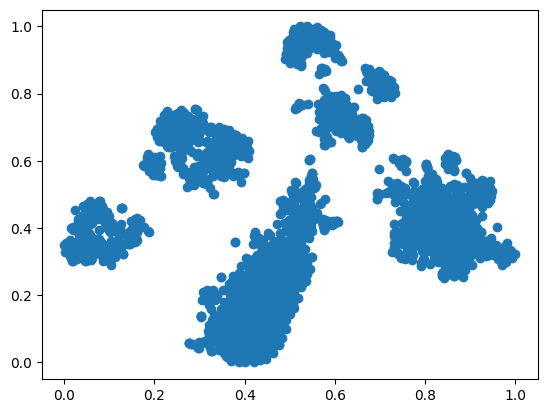

In [95]:
plt.scatter(projected_data[:,0],projected_data[:,1],marker='o')

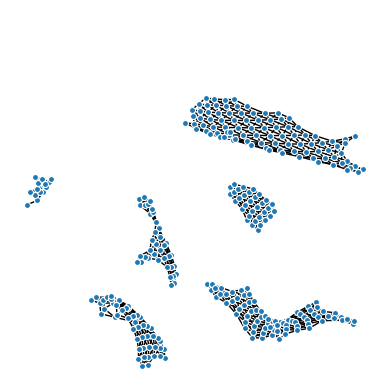

In [105]:
projected_data = mapper.fit_transform(c_s,projection=sklearn.manifold.TSNE(metric='cosine'))
graph = mapper.map(projected_data,
                   clusterer=sklearn.cluster.DBSCAN(eps=0.3, min_samples=10),
                   cover=km.Cover(30, 0.5),
                   remove_duplicate_nodes= True)
mapper.visualize(graph,path_html='heart_data2.html',custom_tooltips=np.array(cat))
km.draw_matplotlib(graph)
import matplotlib.pyplot as plt
plt.show()

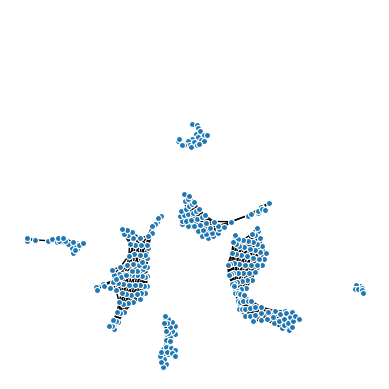

In [116]:
projected_data = mapper.fit_transform(c_s,projection=sklearn.manifold.TSNE(metric='cosine'))
graph = mapper.map(projected_data,
                   clusterer=sklearn.cluster.DBSCAN(eps=0.3, min_samples=15),
                   cover=km.Cover(30, 0.5),
                   remove_duplicate_nodes= True)
mapper.visualize(graph,path_html='heart_data3.html',custom_tooltips=np.array(cat))
km.draw_matplotlib(graph)
import matplotlib.pyplot as plt
plt.show()
#If there are multiple clusters with the same color type, reduce cover
#If all are distinct, increase cover